# Make a Neural net
### Three important functions
* σ  (Sigma meaning "s" for reasons that will become apperent), 
* y′ (this is the derivitive) and 
* δ  (delta is the error * the derivitive)
I like to be able to visualise what's going on with a function so we will see what is output from each of these.

In [13]:
σ(x)  = 1/(1+exp(-x))                     # sigma
y′(x) = (x*(1-x))                         # derivitive
δ(error, layer)  = (error .* y′.(layer))  # delta

δ (generic function with 1 method)

Ok, let's just see what is output by the sigma function if we give it a value...

In [59]:
σ(1)

0.7310585786300049

Well, that isn't very infomative! to be able to visualise what is going on with a function it is often helpful to pass it an array of values (say from 0 - 1000) and then draw the output values to a graph. Let's do that... but I think -5 through 5 would be better for the Sigma function...

In [60]:
sigmoid = [ σ(x) for x in -5:0.01:5]

1001-element Array{Float64,1}:
 0.00669285
 0.00675966
 0.00682713
 0.00689527
 0.00696409
 0.00703359
 0.00710377
 0.00717466
 0.00724624
 0.00731853
 0.00739154
 0.00746527
 0.00753973
 ⋮         
 0.992535  
 0.992608  
 0.992681  
 0.992754  
 0.992825  
 0.992896  
 0.992966  
 0.993036  
 0.993105  
 0.993173  
 0.99324   
 0.993307  

#### So let me explain the code here:
we want to do run the σ(x) function over and over so we say:  for x in range
rang is what it sounds like (a range of values/numbers) 
...in this case we specified a range of -5 through 5 ( -5:5 ) 
...but incrementing in steps of 0.01 (-5:0.01:10)
the output is saved to x ...and the σ(x) function is run.
then the result is saved in sigmoid

In [34]:
using Gadfly                                 # Gadfly is to add plotting functionality
Gadfly.push_theme(:dark)                     # make thinks pretty, I prefere the dark theme

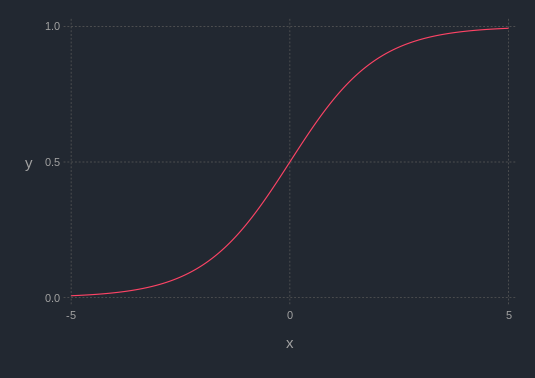

In [36]:
plot(x=(-5:0.01:5), y=sigmoid, Geom.line)

Now you can see why it's called a _sigmoid_(literally "S-like") curve! With a little immagination you could think of some great uses for this curve. It's interesting because it eases in and out slowly. This is just the type of vaiation in speed that you might see in an object that is pushed accross a table for instance. It starts slow and quickly gains speed and then slows to a stop. It's a very natural movement!

Ok, let's do the same for y′ (the derivitive) ...

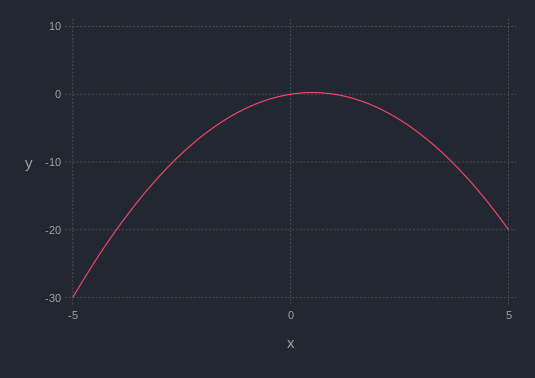

In [39]:
derivitive = [ y′(x) for x in -5:0.01:5]
plot(x=(-5:0.01:5), y=derivitive, Geom.line )

The delta function computes the derivitive of a set of data and then multiplies it by the error. But for this to be understandable it would be good to have a range of values to work with ...to see how the data is changed by this function.
How about we take random data ...and the data from the sigmoid curve we made feed those into our function and see what we get when we plot it! 

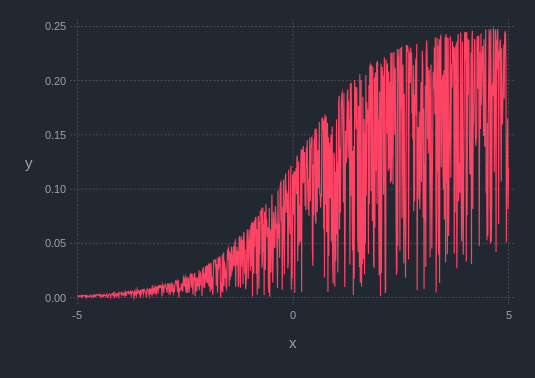

In [15]:
randomValues = [ rand() for x in -5:0.01:5]
delta = δ(sigmoid, randomValues )
plot(x=(-5:0.01:5), y=delta, Geom.line)

Very interesting right! So, basically, if we just draw/plot the random values alone we would have an evenly distributed jagged scribble. But with this function we are forcing the random values toward the reach of the sigmoid curve. If we used some other curve (simple or otherwize) instead of the sigmoid then we would see something similer happen. The data would always tend to conform to the curve we give it.

Can you think of any ways to use this? If you think of the function as correcting the random input data then you will probably find many applications for such a function.

You might have noticed that the curve looks about the same but the values are actually only about a quarter of those of the sigmoid curve which ranged from 0 to 1. We can fix this by miultiplying all the values by 4. If you want to do this really easily you can use the dot (.) operator. It allows you to apply one operation/function to a whole array/set of values. Maybe you already noticed that we have used this above.

In [68]:
delta .*= 4

1001-element Array{Float64,1}:
 0.00430135 
 0.00483388 
 0.00281054 
 0.00682929 
 0.00513631 
 0.00540996 
 0.00258811 
 0.00143629 
 0.00671353 
 0.000304007
 0.000271356
 0.00706134 
 0.00629832 
 ⋮          
 0.215464   
 0.213725   
 0.464927   
 0.107438   
 0.961567   
 0.991754   
 0.866335   
 0.991431   
 0.917672   
 0.404541   
 0.368137   
 0.534261   

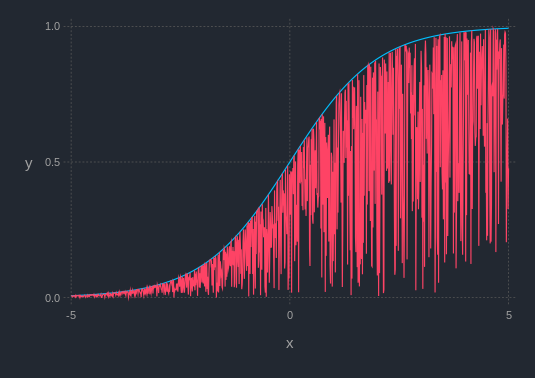

In [30]:
plot(
    layer(x=(-5:0.01:5), y=delta*4, Geom.line),
    layer(x=(-5:0.01:5), y=sigmoid, Geom.line , Theme(default_color="deepskyblue") )
    )

There, that's better!

Now let's take a look at something else...
Below is a 2D (meaning it has rows and cols) array of numbers. We could put this all in one line but it looks pretty like this.

In [40]:
x = [   0 0 1 ; 
        0 1 1 ; 
        1 0 1 ; 
        1 1 1     ]

4×3 Array{Int64,2}:
 0  0  1
 0  1  1
 1  0  1
 1  1  1

Really the pertinent data is in the first two columns and the third is just all ones. Dont worry too much about the last col for now. 

There are four basic logical operations: and, or, Xor and not. What we want to do is build an AI that will learn to Xor two bits together and produce the results. 
here are the four logical operations:
                                         0 Xor 0 = 0
                                         0 Xor 1 = 1
                                         1 Xor 0 = 1
                                         1 Xor 1 = 0
                                         
Let's just go ahead and put thos into an array.                                         

In [41]:
y = [  0; 1; 1; 0  ] # in one line this time.

4-element Array{Int64,1}:
 0
 1
 1
 0

Now we need to make a couple of layers that look almost like the x and y arrays we just made but we need them to have random values ranging from -1 to 1. That's a range of 2 on the number line so the easiest way to do this is to take our random number (which will be a fraction of 1) multiply that by 2 and subtract one. Let me explain that:

lets say our random number X is .25 ...(X*2) = .5  ...  (.5 - 1) = -.5 so it does fall within our range. You can test it out with a few different values to see for yourself.

In [42]:
layer0 = 2*rand(3,4)-1

3×4 Array{Float64,2}:
 -0.563863   0.547243  -0.370725    -0.742825
 -0.432514  -0.906845   0.00361936  -0.896051
 -0.726953  -0.910001  -0.276197    -0.755205

In [ ]:
That worked fine now the other one...

In [43]:
layer1 = 2*rand(4,1)-1

4×1 Array{Float64,2}:
  0.835515
 -0.152004
 -0.497448
 -0.201199

Now let's take a look at a cool feature of the language. if you have two arrays, say: 
A = [ 1 2 3 4 ]    ...and 
B = [ 2 4 6 8 ]

You would have to get each value and add, subtract multiply, etc them one by one in many languages. 
like this:      C[1] = A[1] * B[1]

In some languages like julia though you can just do this: 
C = A * B

That is basically what we are doing here below

In [44]:
x * layer0 # just peeking at the results ;)

4×4 Array{Float64,2}:
 -0.726953  -0.910001  -0.276197  -0.755205
 -1.15947   -1.81685   -0.272578  -1.65126 
 -1.29082   -0.362757  -0.646922  -1.49803 
 -1.72333   -1.2696    -0.643303  -2.39408 

## forward Propagation
Let's go ahead and do that for real and get the sigmoid of each value.

In [45]:
l1 = σ.(x * layer0)

4×4 Array{Float64,2}:
 0.325864  0.287     0.431386  0.319688 
 0.238764  0.139813  0.432274  0.160939 
 0.215715  0.410292  0.343683  0.182719 
 0.151443  0.219325  0.3445    0.0836251

Then we will take layer1 which, if you remember has only one column, and multiply it to our results and get the sigmoid.

In [46]:
l2 = σ.(l1 * layer1)

4×1 Array{Float64,2}:
 0.487434
 0.482713
 0.47755 
 0.476267

## Backpropagation
Now, we are supposedly trying to train a set of node to give us the right answer for the four questions. That's the idea behind training deep nets, anyway! So, let's just compare theresults to our set of correct answers that we made earlier. That was an array called: y

In [48]:
l2_error = y - l2

4×1 Array{Float64,2}:
 -0.487434
  0.517287
  0.52245 
 -0.476267

In [49]:
l2_Δ = δ(l2_error, l2)

4×1 Array{Float64,2}:
 -0.121782
  0.129167
  0.130349
 -0.118799

In [50]:
l1_error = l2_Δ .* transpose(layer1)

4×4 Array{Float64,2}:
 -0.10175    0.0185113   0.06058     0.0245023
  0.107921  -0.019634   -0.064254   -0.0259883
  0.108909  -0.0198136  -0.064842   -0.0262261
 -0.099258   0.0180579   0.0590961   0.0239022

In [51]:
l1_Δ = δ(l1_error, l1)

4×4 Array{Float64,2}:
 -0.0223522   0.00378799   0.0148598   0.00532895
  0.0196153  -0.00236128  -0.0157688  -0.0035094 
  0.0184254  -0.00479396  -0.0146261  -0.00391643
 -0.0127554   0.00309191   0.0133451   0.00183167

## Update weights


In [53]:
layer0 += transpose(x) * l1_Δ

3×4 Array{Float64,2}:
 -0.558193   0.545541  -0.372006    -0.74491 
 -0.425654  -0.906114   0.00119566  -0.897729
 -0.72402   -0.910276  -0.278387    -0.755471

In [54]:
layer1 += transpose(l1) * l2_Δ

4×1 Array{Float64,2}:
  0.836798
 -0.141471
 -0.490275
 -0.20546 

let's see what our erro rate is now.

In [55]:
mean(abs.(l2_error))

0.5008596535823773

In [57]:
l2 # new output

4×1 Array{Float64,2}:
 0.487434
 0.482713
 0.47755 
 0.476267

Now, for this to really work we would need to keep training our network so here we wrap all of the important stuff into one function that can repeat the training many times.

In [ ]:
function train(input, output, iterations, layer0, layer1)
    for j in 1:iterations

        # Calculate forward through the network.
            l0 = input
            l1 = σ.(l0 * layer0)

            l2 = σ.(l1 * layer1)

        # Back propagation of errors using the chain rule.
            l2_error = output - l2
            l2_Δ = δ(l2_error, l2) # l2_error .* y′.(l2)
            
            l1_error = l2_Δ .* transpose(layer1)
            l1_Δ = δ(l1_error, l1) # l1_error .* y′.(l1)

        # Update weights (no learning rate term)
            layer0 += transpose(l0) * l1_Δ
            layer1 += transpose(l1) * l2_Δ

            if(j % 10000) == 0   # Only print the error every 10000 steps.
                println("Error: ", mean(abs.(l2_error)) )
                println("Output: ", l2)
            end
    end
end

In [ ]:
train(x, y, 60000, layer0, layer1)